<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1> Sesión 7. Modelo de clasificación con ANN-Keras. Con optimización de hiperparámetros y evaluación Cross-Validation.</header1></centre>

Miller Janny Ariza Garzón. 
Enero de 2022

# Caso Clasificación. Credit Risk

## Data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_credit = pd.read_csv('D:/UNIR/Cursos/Técnicas de Inteligencia Artificial/Clases/Adicionales/Sesion 7. ANN Clasification. CV.  Hyperopt/data_credit')
df_credit=df_credit[['grade','emp_length_n', 'dti_n', 'revenue', 'loan_amnt', 'fico_n',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'home_ownership_n_MORTGAGE', 'home_ownership_n_OTHER',
       'home_ownership_n_OWN', 'home_ownership_n_RENT']]

In [2]:
df_credit.head()

,grade,emp_length_n,dti_n,revenue,loan_amnt,fico_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_n_MORTGAGE,home_ownership_n_OTHER,home_ownership_n_OWN,home_ownership_n_RENT
0,D,6,30.44,52000.0,23900,697.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,C,11,11.04,90000.0,10000,677.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,A,7,24.37,53000.0,10000,747.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,D,11,22.08,102000.0,21000,687.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,C,11,3.04,60000.0,3200,717.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_credit['grade'] = le.fit_transform(df_credit['grade'])

In [4]:
df_credit.head()

,grade,emp_length_n,dti_n,revenue,loan_amnt,fico_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_n_MORTGAGE,home_ownership_n_OTHER,home_ownership_n_OWN,home_ownership_n_RENT
0,3,6,30.44,52000.0,23900,697.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,11,11.04,90000.0,10000,677.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,7,24.37,53000.0,10000,747.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,3,11,22.08,102000.0,21000,687.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2,11,3.04,60000.0,3200,717.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_credit = pd.read_csv('D:/UNIR/Cursos/Técnicas de Inteligencia Artificial/Clases/Adicionales/Sesion 7. ANN Clasification. CV.  Hyperopt/data_credit')
df_credit=df_credit[['grade','emp_length_n', 'dti_n', 'revenue', 'loan_amnt', 'fico_n',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'home_ownership_n_MORTGAGE', 'home_ownership_n_OTHER',
       'home_ownership_n_OWN', 'home_ownership_n_RENT']]
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
le = LabelEncoder()
df_credit['grade'] = le.fit_transform(df_credit['grade'])
df_credit['grade'].value_counts(normalize=True, sort=True, ascending=True)
df_credit=df_credit.groupby('grade', group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=123))
df_credit['grade'].value_counts(normalize=True, sort=True, ascending=True)
df_credit['grade'].value_counts()

2    2303
1    2196
0    1580
3    1226
4     673
5     198
6      44
Name: grade, dtype: int64

## Partición del Dataset y transformación de las variables de entrada (MinMaxScaler)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


X_train, X_test, y_train, y_test = train_test_split(df_credit.drop(labels=['grade', ], axis=1),df_credit['grade'], test_size=0.3, random_state=123, stratify=df_credit['grade'])

#X_train_s = MinMaxScaler(X_train)
scaler = MinMaxScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)

## Arquitectura de la red - Definición y optimización de hiperparámetros. Uso de KerasClassifier class

In [10]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import pandas as pd
from sklearn.compose import ColumnTransformer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
tf.random.set_seed(123)

neurons=5
optimizer='adam'

def model_ann(neurons=neurons, optimizer=optimizer):
  # creating the layers of the ANN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=neurons, input_dim=len(X_train.keys()), activation='relu'))
  ann.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=7, activation='softmax'))
  # Compile model
  ann.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return ann

model=KerasClassifier(build_fn=model_ann, verbose=0)

params={'batch_size':[50, 32], 
        'nb_epoch':[20, 50],
        'neurons':[15, 30],
       'optimizer':['rmsprop', 'adam'],}

'''activations = ['tanh','relu','sigmoid']
initializers = ['glorot_uniform', 'normal', 'uniform']'''

grid = GridSearchCV(estimator=model, param_grid=params, cv=3)
grid_result = grid.fit(X_train_s, y_train, verbose=0)

## Optimización de hiperparámetros. Estadísticas. Identificación del mejor conjunto de hiperparámetros

In [11]:
print("El mejor accuracy: {}\nY la mejor combinación de hiperparámetros: {}".format(grid_result.best_score_, 
                             grid_result.best_params_))

El mejor accuracy: 0.3142161965370178
Y la mejor combinación de hiperparámetros: {'batch_size': 32, 'nb_epoch': 50, 'neurons': 30, 'optimizer': 'rmsprop'}


In [12]:
import pandas as pd
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
d_hhiper=pd.DataFrame(params)
d_hhiper['Mean']=means
d_hhiper['Std. Dev']=stds
d_hhiper.sort_values(by='Mean', ascending=False).head()

,batch_size,nb_epoch,neurons,optimizer,Mean,Std. Dev
14,32,50,30,rmsprop,0.314216,0.009417
6,50,50,30,rmsprop,0.308481,0.015386
10,32,20,30,rmsprop,0.305353,0.005132
15,32,50,30,adam,0.301008,0.012501
9,32,20,15,adam,0.295794,0.011282


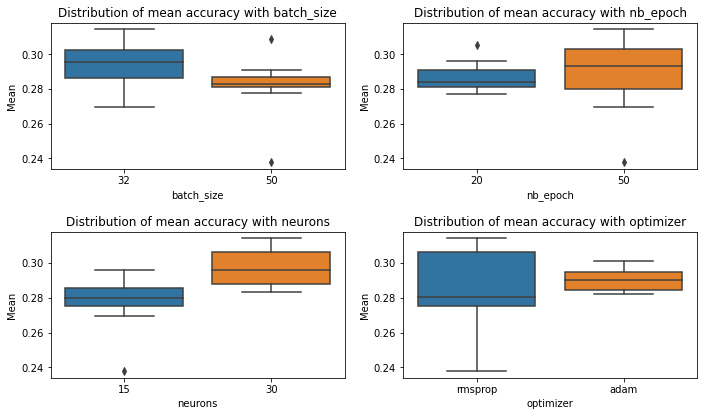

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
param_ = ['batch_size','nb_epoch','neurons','optimizer']

fig, ax = plt.subplots(2,2,figsize=(10,6), squeeze=False)
ax = ax.ravel()
for i in range(4):
    ax[i].set_title('Distribution of mean accuracy with {}'.format(param_[i]))
    sns.boxplot(x=param_[i],y='Mean',data=d_hhiper,ax=ax[i])
fig.tight_layout(pad=1.5)

## Arquitectura de red con el "mejor" conjunto de hiperparámetros

In [14]:
model_ann_f= model_ann(neurons=grid_result.best_params_['neurons'], 
                   optimizer=grid_result.best_params_['optimizer'])
model_ann_f.summary()

Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_297 (Dense)           (None, 30)                720       
                                                                 
 dense_298 (Dense)           (None, 30)                930       
                                                                 
 dense_299 (Dense)           (None, 7)                 217       
                                                                 
Total params: 1,867
Trainable params: 1,867
Non-trainable params: 0
_________________________________________________________________


## Diferentes algoritmos de modelación vs la "mejor" red. Desempeño - Stratified CV

MLR: 0.374175 (0.009245)
CART: 0.282064 (0.009669)
RF: 0.351758 (0.011525)
ANN: 0.379911 (0.012391)


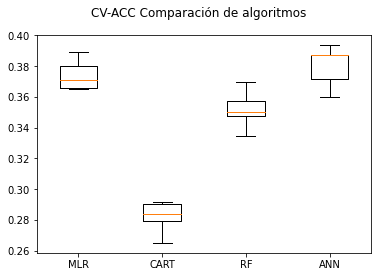

In [15]:
#Comparar modelos
import matplotlib.pyplot as plt
from sklearn import model_selection
from keras.wrappers.scikit_learn import KerasClassifier
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
tf.random.set_seed(123)

neurons=grid_result.best_params_['neurons']
optimizer=grid_result.best_params_['optimizer']

epochs=grid_result.best_params_['nb_epoch']
batch_size=grid_result.best_params_['batch_size']

model_ann_f = KerasClassifier(build_fn=model_ann, epochs=epochs, batch_size=batch_size, verbose=0)

seed = 221
models = []
models.append(('MLR', LogisticRegression(random_state = 123)))
models.append(('CART', DecisionTreeClassifier(random_state = 123)))
models.append(('RF', RandomForestClassifier(random_state = 123)))
models.append(('ANN', model_ann_f))
# evaluate each model in turn
results_c = []
names_c = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_s, y_train, cv=kfold, scoring=scoring)
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('CV-ACC Comparación de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

## Diferentes algoritmos de modelación vs la "mejor" red. Desempeño en conjunto de Test

MLR: 0.366180
CART: 0.289538
RF: 0.336577
ANN: 0.366586


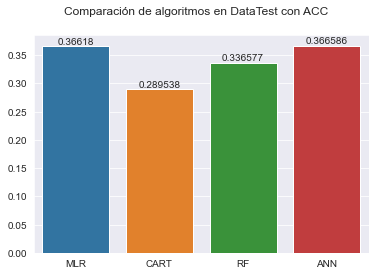

In [16]:
#Comparar modelos. Entrenamiento con DataTrain completo y evaluación con DataTest.
import matplotlib.pyplot as plt
from sklearn import model_selection
from keras.wrappers.scikit_learn import KerasClassifier
import pandas
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tf.random.set_seed(123)

neurons=grid_result.best_params_['neurons']
optimizer=grid_result.best_params_['optimizer']
epochs=grid_result.best_params_['nb_epoch']
batch_size=grid_result.best_params_['batch_size']

model_ann_f = model_ann(neurons, optimizer)
model_ann_f.fit(X_train_s, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
test_loss, test_acc = model_ann_f.evaluate(X_test_s, y_test, verbose=0)

seed = 221
models = []
models.append(('MLR', LogisticRegression(random_state = 123)))
models.append(('CART', DecisionTreeClassifier(random_state = 123)))
models.append(('RF', RandomForestClassifier(random_state = 123)))
# evaluate each model in turn
results_t = []
names_t = []
scoring = 'accuracy'
for name, model in models:
    model.fit(X_train_s, y_train)
    results_m=accuracy_score(y_test, model.predict(X_test_s))
    results_t.append(results_m)
    names_t.append(name)
    msg = "%s: %f" % (name, results_m)
    print(msg)
print("%s: %f" % ('ANN', test_acc))

results_t.append(test_acc)
names_t.append('ANN')


# boxplot algorithm comparison
fig = plt.figure()
sns.set_style('darkgrid')
fig.suptitle('Comparación de algoritmos en DataTest con ACC')
ax = fig.add_subplot(111)
sns.barplot(names_t, results_t)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [17]:
model_ann_f.summary()
test_loss, test_acc = model_ann_f.evaluate(X_test_s, y_test, verbose=0)
print(test_acc)

Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_315 (Dense)           (None, 30)                720       
                                                                 
 dense_316 (Dense)           (None, 30)                930       
                                                                 
 dense_317 (Dense)           (None, 7)                 217       
                                                                 
Total params: 1,867
Trainable params: 1,867
Non-trainable params: 0
_________________________________________________________________
0.36658555269241333


## Predicción individual

In [181]:
# Predicción individual 
import numpy as np
new_register = np.expand_dims(X_test_s[4,:],0)

predictions_single = model_ann_f.predict(new_register)
print(predictions_single)

[[4.8024982e-01 3.5762587e-01 1.2115192e-01 3.8293079e-02 2.4904970e-03
  1.8811507e-04 6.6513360e-07]]


Predicción de Grade: 0 ; Real Grade: 1


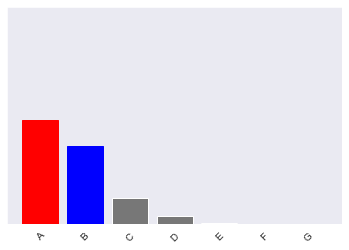

In [182]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

print('Predicción de Grade:', np.argmax(predictions_single[0]),";", 'Real Grade:', y_test.iloc[4])

def plot_value_array(i, predictions, true_y):
  predictions, true_y = predictions, true_y.iloc[i]
  plt.grid(False)
  plt.xticks(range(7))
  plt.yticks([])
  thisplot = plt.bar(range(7), predictions, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions)
  thisplot[predicted_label].set_color('red')
  thisplot[true_y].set_color('blue')

plot_value_array(4, predictions_single[0], y_test)
_ = plt.xticks(range(7), class_names, rotation=45)